In [12]:
import numpy as np
#import pandas
import pandas as pd
#check version of panda
print(pd.__version__)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import seaborn as sns

1.3.0


In [13]:
#read data (need to give correct path)
dataMD = pd.read_csv("../../data/raw/Medical_Cost.csv") 
# Preview the first 5 lines of the loaded data 
dataMD.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
dataMD

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


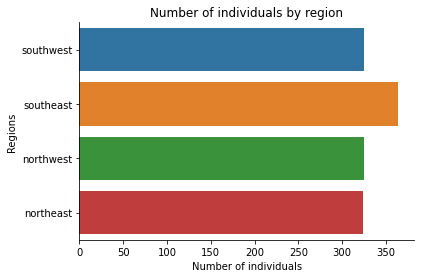

In [15]:
# Your Solution here
ax = plt.axes()
g = sns.countplot(y='region',data=dataMD).set_title("Number of individuals by region")
plt.xlabel("Number of individuals")
plt.ylabel("Regions")
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

<AxesSubplot:xlabel='region', ylabel='charges'>

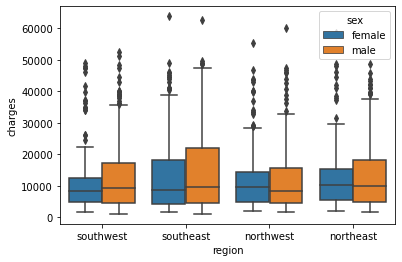

In [16]:
sns.boxplot(x='region',y='charges',data=dataMD,hue='sex')

<AxesSubplot:xlabel='region', ylabel='charges'>

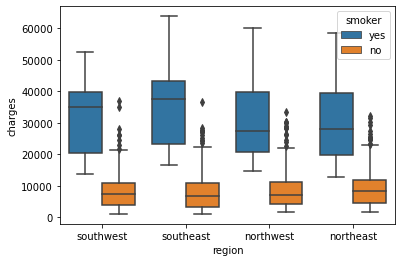

In [17]:
sns.boxplot(x='region',y='charges',data=dataMD,hue='smoker')

None


(0.0, 47.0)

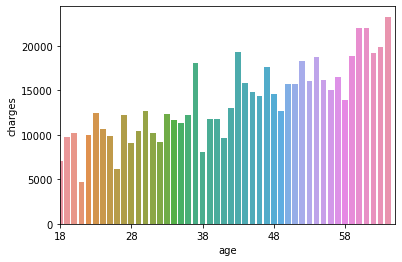

In [18]:
ax = plt.axes()
sns.barplot(x='age',y='charges',data=dataMD,ci=None)
print(ax.xaxis.set_major_locator(MultipleLocator(10)))
plt.xlim(0, 47)

In [19]:
dataMD['Cost Per Individual For a Family']  = (dataMD['charges'] / (dataMD['children'] + 1))
dataMD.head()

,age,sex,bmi,children,smoker,region,charges,Cost Per Individual For a Family
0,19,female,27.900,0,yes,southwest,16884.92400,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230,862.77615
2,28,male,33.000,3,no,southeast,4449.46200,1112.36550
3,33,male,22.705,0,no,northwest,21984.47061,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520,3866.85520


In [54]:
dataMD['Charges Per 1 unit of BMI Per Individual in a Family']  = (dataMD['Cost Per Individual For a Family'] / (dataMD['bmi']))
dataMD.drop(columns=['Charges Per BMI Per Individual in a Family'],axis=0)

,age,sex,bmi,children,smoker,region,charges,Cost Per Individual For a Family,Charges Per 1 unit of BMI Per Individual in a Family
0,19,female,27.900,0,yes,southwest,16884.92400,16884.924000,605.194409
1,18,male,33.770,1,no,southeast,1725.55230,862.776150,25.548598
2,28,male,33.000,3,no,southeast,4449.46200,1112.365500,33.708045
3,33,male,22.705,0,no,northwest,21984.47061,21984.470610,968.265607
4,32,male,28.880,0,no,northwest,3866.85520,3866.855200,133.893878
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,2650.137075,85.571103
1334,18,female,31.920,0,no,northeast,2205.98080,2205.980800,69.109674
1335,18,female,36.850,0,no,southeast,1629.83350,1629.833500,44.228860
1336,21,female,25.800,0,no,southwest,2007.94500,2007.945000,77.827326


In [34]:
for ind in dataMD.index:
    if dataMD['bmi'][ind] < 18.5:
        dataMD['Weight Range'][ind] = 'Underweight'
    elif dataMD['bmi'][ind] >= 18.5 and dataMD['bmi'][ind] < 25:
        dataMD['Weight Range'][ind] = 'Healthy Weight'
    elif dataMD['bmi'][ind] >= 25 and dataMD['bmi'][ind] < 30:
        dataMD['Weight Range'][ind] = 'Overweight'
    else:
        dataMD['Weight Range'][ind] = 'Obese'       
dataMD.head()

ValueError: Length of values (1) does not match length of index (1338)